### Download shape file here: https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html

In [ ]:
import geopandas as gpd
df_map = gpd.read_file('../../Florida-zipcodes-csv/cb_2020_us_zcta520_500k.shp')
df_map.head()

In [ ]:
ZIPS = ['33510', '33511', '33527', '33534', '33547', '33548', '33549', '33556', '33558', '33559', '33563', '33565',
            '33566', '33567', '33569', '33570', '33572', '33573', '33578', '33579', '33584', '33592', '33594', '33596',
            '33598', '33602', '33603', '33604', '33605', '33606', '33607', '33609', '33610', '33611', '33612', '33613',
            '33614', '33615', '33616', '33617', '33618', '33619', '33624', '33625', '33626', '33629', '33634', '33635',
            '33637', '33647',
            '33620', '33503']


In [ ]:
hillsborough=df_map[df_map['ZCTA5CE20'].isin(ZIPS)]
hillsborough.rename(columns={'ZCTA5CE20':'zipcode'}, inplace=True)
#hillsborough
hillsborough['zip_code'] = hillsborough['zipcode'].astype('str')
hillsborough['zip_code'] = hillsborough['zip_code'].str.pad(5, 'left', '0')
hillsborough['zip_code'] = hillsborough['zip_code'].str.slice(0,3)
hillsborough['zip_code'] = hillsborough['zip_code'].str.pad(5, 'right', 'x')
hillsborough

In [ ]:
from uszipcode import SearchEngine

search = SearchEngine(simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.simple)
zipcode = search.by_zipcode("33647")
zipcode

In [ ]:
hillsborough['state'] = hillsborough.apply(lambda row: search.by_zipcode(row.zipcode).state, axis=1)
hillsborough['county'] = hillsborough.apply(lambda row: search.by_zipcode(row.zipcode).county, axis=1)
#hillsborough

In [ ]:
import pandas as pd
import random
df_redlines=pd.DataFrame(ZIPS, columns=['zipcode'])

df_redlines['zip_area']=[random.random() for x in range(len(ZIPS))]
#df_redlines

In [ ]:
import matplotlib.pyplot as plt

df_redlines_maps = hillsborough.merge(df_redlines, on='zipcode', how='left')
dfm = df_redlines_maps[df_redlines_maps.zip_area>0]
#dfm
#dfm.to_csv("hillsborough-zipcodes-boundarymap.csv", index=False) # dataframe
#dfm.to_file("hillsborough-zipcodes-boundarymap.geojson", driver="GeoJSON")
#dfm.to_json()

In [ ]:
ZIPS_centers={ '33510':[27.96, -82.30], 
                '33511':[27.90, -82.30],
                '33527':[27.97, -82.22],
                '33534':[27.83, -82.38],
                '33547':[27.8, -82.1-0.05],
                '33548':[28.15, -82.48],
                '33549':[28.14, -82.45],
                '33556':[28.2, -82.6],
                '33558':[28.16, -82.51],
                '33559':[28.16, -82.40-0.02],
                '33563':[28.02, -82.13],
                '33565':[28.10, -82.15],
                '33566':[27.99-0.01, -82.13],
                '33567':[27.91, -82.12],
                '33569':[27.85, -82.29],
                '33570':[27.70, -82.47],
                '33572':[27.77, -82.40],
                '33573':[27.73, -82.36],
                '33578':[27.84+0.04, -82.35],
                '33579':[27.80, -82.28],
                '33584':[28.00, -82.29],
                '33592':[28.10, -82.28],
                '33594':[27.94, -82.24],
                '33596':[27.89, -82.23],
                '33598':[27.7, -82.3],
                '33602':[27.95, -82.46],
                '33603':[27.99, -82.46],
                '33604':[28.01, -82.45],
                '33605':[27.94, -82.43],
                '33606':[27.93, -82.46],
                '33607':[27.96, -82.54],
                '33609':[27.94, -82.52],
                '33610':[28.00, -82.38],
                '33611':[27.89, -82.51],
                '33612':[28.05, -82.45],
                '33613':[28.09, -82.45],
                '33614':[28.01, -82.50],
                '33615':[28.00, -82.58],
                '33616':[27.86, -82.53],
                '33617':[28.04, -82.39],
                '33618':[28.08-0.01, -82.50],
                '33619':[27.90+0.04, -82.38],
                '33624':[28.08+0.01, -82.52],
                '33625':[28.07, -82.56],
                '33626':[28.06, -82.61],
                '33629':[27.92, -82.51],
                '33634':[28.00, -82.54],
                '33635':[28.02, -82.61],
                '33637':[28.05, -82.36],
                '33647':[28.12, -82.35-0.04],
                '33620':[28.062, -82.410],
                '33503':[27.753, -82.2883]}

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 20))
#dfm.plot(marker='o', facecolors='none', edgecolors='black', linewidth=0.5, markersize=100, alpha=.2, ax=ax)
#dfm.plot(ax=ax, alpha=.1)
# cmap='Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
# 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
# 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
# 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
# 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
# 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 
# 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
# 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 
# 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 
# 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
# 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 
# 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 
# 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
# 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
# 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 
# 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 
# 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 
# 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
# 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 
# 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
dfm.plot(ax=ax, column='zip_area', k=3, edgecolors='black', linewidth=0.1, cmap='GnBu_r', legend=True,
    legend_kwds={'label': "risky area", 'orientation': 'horizontal',
    'pad':0.05, 'shrink':0.2}) 
#ax.axis('off')
ax.set_title('Florida Hillsborough County Zipcodes', fontdict={'fontsize': '20', 'fontweight' : '3'})

for z in range(len(ZIPS)):
    text = ax.text(ZIPS_centers[ZIPS[z]][1], ZIPS_centers[ZIPS[z]][0], str(ZIPS[z]), 
                    ha="center", va="center", 
                    color="black")

In [298]:
#dfm2=pd.read_csv("hillsborough-zipcodes-boundarymap.csv")
dfm2=gpd.read_file("hillsborough-zipcodes-boundarymap.geojson")
type(dfm2)
dfm2.geometry

0     POLYGON ((-82.42300 28.05705, -82.41988 28.058...
1     MULTIPOLYGON (((-82.46510 28.10038, -82.46352 ...
2     POLYGON ((-82.43878 28.10396, -82.43075 28.107...
3     POLYGON ((-82.28148 27.77024, -82.27475 27.770...
4     POLYGON ((-82.48665 27.98689, -82.48459 27.987...
5     MULTIPOLYGON (((-82.26012 27.91803, -82.25999 ...
6     POLYGON ((-82.55483 27.85151, -82.55182 27.856...
7     POLYGON ((-82.41742 27.79826, -82.41252 27.794...
8     POLYGON ((-82.34387 28.03664, -82.33540 28.041...
9     POLYGON ((-82.26929 27.85723, -82.26929 27.857...
10    POLYGON ((-82.54282 27.89060, -82.54177 27.893...
11    POLYGON ((-82.38953 27.70618, -82.38708 27.709...
12    POLYGON ((-82.44319 27.98732, -82.44297 27.988...
13    POLYGON ((-82.20564 28.02329, -82.20360 28.024...
14    POLYGON ((-82.32808 27.95226, -82.32667 27.962...
15    POLYGON ((-82.26519 27.97174, -82.26337 27.971...
16    POLYGON ((-82.48659 28.04208, -82.48480 28.041...
17    POLYGON ((-82.52763 28.03731, -82.51412 28

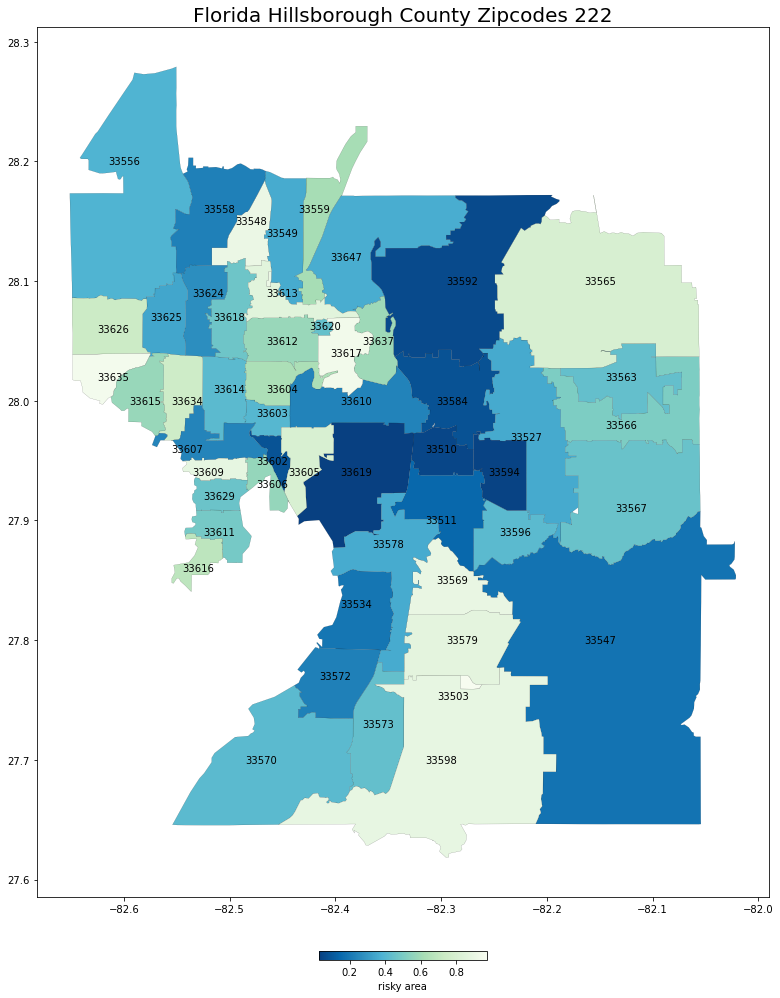

In [310]:
from plotly.tools import mpl_to_plotly

fig2, ax2 = plt.subplots(1, figsize=(15, 20))


for z in range(len(ZIPS)):
    text = ax2.text(ZIPS_centers[ZIPS[z]][1], ZIPS_centers[ZIPS[z]][0], str(ZIPS[z]), 
                    ha="center", va="center", 
                    color="black")
ax2.set_title('Florida Hillsborough County Zipcodes 222', fontdict={'fontsize': '20', 'fontweight' : '3'})
dfm2.plot(ax=ax2, column='zip_area', k=3, edgecolors='black', linewidth=0.1, cmap='GnBu_r', legend=True,
    legend_kwds={'label': "risky area", 'orientation': 'horizontal',
    'pad':0.05, 'shrink':0.2})
fig2.savefig("temp.jpg")
#ax.axis('off')



In [320]:
import plotly.express as px

#fig = px.choropleth(dfm2, geojson=dfm2.geometry, locations="zipcode", color="zip_area", locationmode="USA-states")
#fig.update_geos(fitbounds="locations", visible=False)

fig = px.choropleth_mapbox(dfm2, geojson=dfm2, locations='zipcode', color='zip_area', featureidkey="properties.zipcode",
                           color_continuous_scale="Viridis",
                           #range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=9, center = {"lat": 28.0, "lon": -82.5},
                           opacity=0.5,
                           #labels={'zip_area':'random'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
